Iris Dataset

MultiClassifcation

In [16]:
import pandas as pd

df = pd.read_csv('Iris.csv')
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [20]:
# create new_df to change Species type to string
new_df = {
    'ID': df['Id'],
    'SepalLength': df['SepalLengthCm'],
    'SepalWidth': df['SepalWidthCm'],
    'PetalLength': df['PetalLengthCm'],
    'PetalWidth': df['PetalWidthCm'],
    'Species': df['Species'].astype(str)
}

iris_df = pd.DataFrame(new_df)
iris_df.info() #check for nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           150 non-null    int64  
 1   SepalLength  150 non-null    float64
 2   SepalWidth   150 non-null    float64
 3   PetalLength  150 non-null    float64
 4   PetalWidth   150 non-null    float64
 5   Species      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB



Training data, creating Decision Tree model, fitting model, and testing accuracy of the Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x = iris_df[['SepalWidth','PetalLength','PetalWidth']]
y = iris_df[['Species']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# Create Decision Tree Model
model = DecisionTreeClassifier(max_depth=5) 
model.fit(x_train,y_train)


y_pred = model.predict(x_test)
# print(y_test)
# print(y_pred)
accuracy = model.score(x_test, y_test)
print(accuracy)

0.9333333333333333


Visualizing results using a visual representation of the decision tree and a confusion matrix

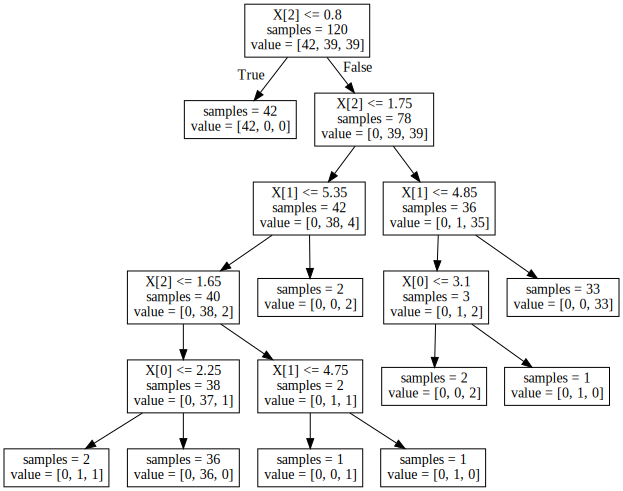

In [13]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(model, out_file=None, impurity=False) 
graph = graphviz.Source(dot_data) 
graph #shows the visual representation of decision tree process

<AxesSubplot:>

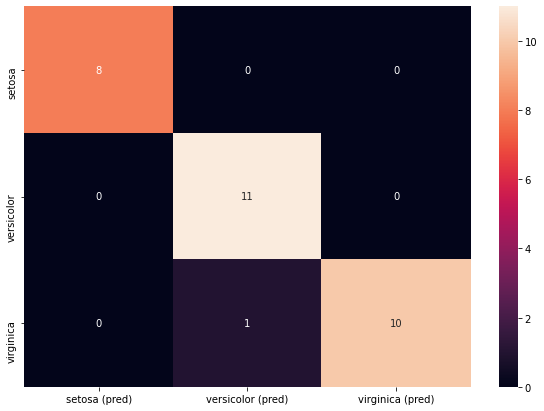

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix = confusion_matrix(y_test,y_pred) #creating the confusion matrix
cm_df = pd.DataFrame(
    confusion_matrix, 
    index = [idx for idx in ['setosa', 'versicolor', 'virginica']],
    columns = [col for col in ['setosa (pred)', 'versicolor (pred)', 'virginica (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(cm_df, annot=True)